In [68]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 讀取CSV檔案
data = pd.read_csv("game_stats.csv")
data.head(6)

,隊伍,贏,敗,勝率,兩分%,三分%,罰球%,得分,籃板,助攻,抄截,阻攻,對手兩分%,對手三分%,對手罰球%,對手得分,對手籃板,對手助攻,對手抄截,對手阻攻
0,新北國王,27,13,0.68,0.4615,0.3281,0.6709,97.15,54.83,23.68,11.00,4.10,0.4797,0.2994,0.6481,93.68,52.91,20.35,8.78,3.75
1,台北富邦勇士,25,15,0.63,0.4858,0.3277,0.7353,98.58,53.20,23.15,8.90,4.53,0.4769,0.2991,0.6875,93.90,51.51,20.75,9.55,4.00
2,桃園璞園領航猿,19,21,0.48,0.4539,0.2990,0.7178,88.00,52.60,21.55,9.33,2.70,0.4450,0.3081,0.6534,85.35,49.90,17.75,8.88,4.08
3,福爾摩沙台新夢想家,19,21,0.48,0.4658,0.3077,0.6317,92.03,53.55,18.78,9.00,5.85,0.4453,0.3159,0.7077,92.75,54.21,21.90,9.28,3.38
4,高雄17直播鋼鐵人,17,23,0.43,0.4944,0.3204,0.7058,95.90,50.20,21.20,8.25,3.50,0.4746,0.3301,0.6667,97.33,51.88,22.33,9.95,4.55
5,新竹街口攻城獅,13,27,0.33,0.4639,0.2953,0.6093,91.00,49.78,18.80,9.65,2.73,0.5012,0.3296,0.6969,99.65,53.78,24.08,9.70,3.65


R平方值: 0.9871143865308012
MSE: 0.09766953126606777
Root Mean Squared Error: 0.3125212493032558
Variables with tolerance > 0.1:
Series([], Name: Features, dtype: object)


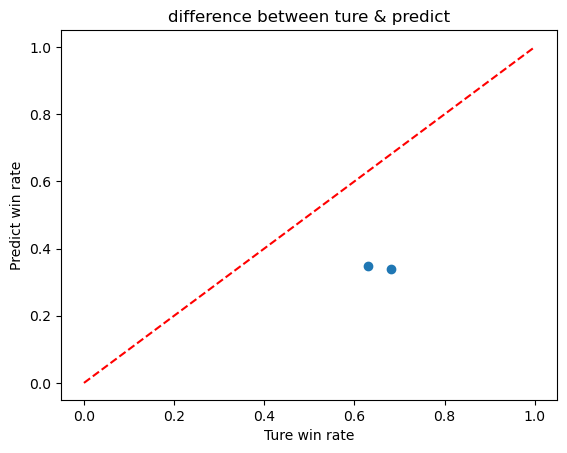

In [163]:
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
#防守數據方面
# 載入資料集
data = pd.read_csv("game_stats.csv")
data.fillna(0, inplace=True)

# 分割特徵和標籤
X = data[['對手兩分%','對手三分%']]
y = data['勝率']

# 切分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 建立回歸模型
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
r_squared = model.score(X_train, y_train)
print('R平方值:',r_squared)

# 模型評估
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("MSE:",mse)
print("Root Mean Squared Error:", rmse)

# 計算VIF
X_train_with_constant = sm.add_constant(X_train)
vif = pd.DataFrame()
vif["Features"] = X_train_with_constant.columns
vif["VIF Factor"] = [sm.OLS(X_train_with_constant[col], X_train_with_constant.drop(col, axis=1))
                     .fit().rsquared for col in X_train_with_constant.columns]
vif = vif.sort_values(by="VIF Factor", ascending=False)

# 找出容忍值大於0.1的項目
tolerance = 1 / vif["VIF Factor"]
significant_features = vif[vif["VIF Factor"] < 0.1]["Features"]
print("Variables with tolerance > 0.1:")
print(significant_features)

# 繪製預測值和實際值的差異圖
plt.scatter(y_test, y_pred)
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # 理想情況下的直線
plt.xlabel('Ture win rate')
plt.ylabel('Predict win rate')
plt.title('difference between ture & predict')
plt.show()

R平方值: 0.983691482953416
MSE: 0.009398793570852522
Root Mean Squared Error: 0.0969473752654115
Variables with tolerance > 0.1:
Series([], Name: Features, dtype: object)


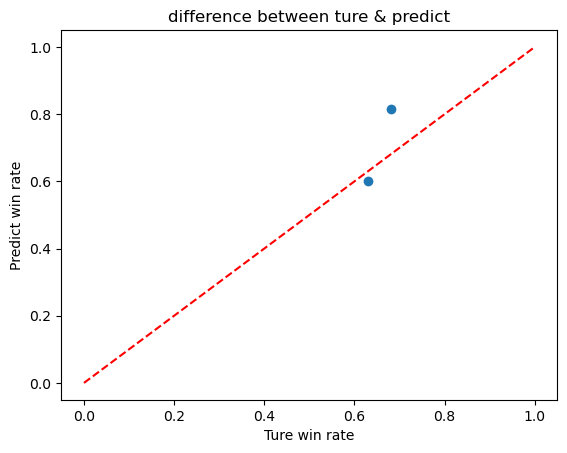

In [164]:
#進攻數據方面
# 載入資料集
data = pd.read_csv("game_stats.csv")
data.fillna(0, inplace=True)

# 分割特徵和標籤
X = data[['兩分%','三分%']]
y = data['勝率']

# 切分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 建立回歸模型
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
r_squared = model.score(X_train, y_train)
print('R平方值:',r_squared)

# 模型評估
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("MSE:",mse)
print("Root Mean Squared Error:", rmse)

# 計算VIF
X_train_with_constant = sm.add_constant(X_train)
vif = pd.DataFrame()
vif["Features"] = X_train_with_constant.columns
vif["VIF Factor"] = [sm.OLS(X_train_with_constant[col], X_train_with_constant.drop(col, axis=1))
                     .fit().rsquared for col in X_train_with_constant.columns]
vif = vif.sort_values(by="VIF Factor", ascending=False)

# 找出容忍值大於0.1的項目
tolerance = 1 / vif["VIF Factor"]
significant_features = vif[vif["VIF Factor"] < 0.1]["Features"]
print("Variables with tolerance > 0.1:")
print(significant_features)

# 繪製預測值和實際值的差異圖
plt.scatter(y_test, y_pred)
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # 理想情況下的直線
plt.xlabel('Ture win rate')
plt.ylabel('Predict win rate')
plt.title('difference between ture & predict')
plt.show()

In [115]:
import pandas as pd

# 讀取CSV檔案
df = pd.read_csv('Win_stats.csv')

# 將'主/客場隊伍'中的資料轉換為數字
df['主場隊伍'] = df['主場隊伍'].map({'新北國王': 1, '台北富邦勇士': 0})
df['客場隊伍'] = df['客場隊伍'].map({'新北國王': 1, '台北富邦勇士': 0})

#將贏球隊伍中的資料轉為數字
df['贏球隊伍'] = df['贏球隊伍'].map({'新北國王': 1, '台北富邦勇士': 0})

# 創建新的欄位，初始值為0
df['主場或客場'] = 0

# 將主場贏球的場次的欄位設置為0
df.loc[(df['主場隊伍'] == 1) & (df['贏球隊伍'] == 1), '主場或客場'] = 0
df.loc[(df['主場隊伍'] == 0) & (df['贏球隊伍'] == 0), '主場或客場'] = 0

# 將客場贏球的場次的欄位設置為1
df.loc[(df['主場隊伍'] == 0) & (df['贏球隊伍'] == 1), '主場或客場'] = 1
df.loc[(df['主場隊伍'] == 1) & (df['贏球隊伍'] == 0), '主場或客場'] = 1


# 顯示處理後的資料
df.head(14)

,場次,贏球隊伍,主場隊伍,主隊兩分%,主隊三分%,主隊罰球%,主隊得分,主隊籃板,主隊助攻,主隊抄截,...,客隊三分%,客隊罰球%,客隊得分,客隊籃板,客隊助攻,客隊抄截,客隊阻攻,客隊失誤,客隊犯規,主場或客場
0,1,1,1,0.48,0.27,0.73,104,66,22,11,...,0.29,0.53,89,58,17,7,7,15,20,0
1,2,1,0,0.53,0.25,0.69,99,62,14,7,...,0.34,0.83,103,48,25,11,6,12,19,1
2,3,1,0,0.55,0.26,0.73,101,45,25,9,...,0.33,0.78,106,67,25,6,7,19,22,1
3,4,1,1,0.56,0.32,0.69,95,51,26,11,...,0.34,0.55,83,41,23,12,4,18,16,0
4,5,0,0,0.53,0.48,0.69,111,49,28,9,...,0.45,0.50,109,46,28,13,5,17,16,0
5,6,0,1,0.53,0.27,0.69,95,56,23,9,...,0.38,0.66,106,57,19,11,0,11,17,1
6,7,1,0,0.54,0.20,0.63,90,55,24,5,...,0.36,0.76,97,54,21,12,2,12,25,1
7,8,0,1,0.39,0.12,0.46,68,62,18,8,...,0.21,0.86,89,69,23,7,3,13,19,1
8,冠軍賽1,1,1,0.52,0.24,0.75,86,54,20,7,...,0.18,0.73,72,51,16,5,5,17,16,0
9,冠軍賽2,0,1,0.40,0.26,0.79,83,44,11,15,...,0.27,0.60,87,54,15,12,6,25,27,1


In [168]:
import pandas as pd
import numpy as np
from math import log2
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

def calculate_entropy(labels):
    n = len(labels)
    classes, counts = np.unique(labels, return_counts=True)
    entropy = 0
    for count in counts:
        p = count / n
        entropy -= p * log2(p)
    return entropy

def calculate_information_gain_ratio(data, attribute, target):
    entropy_s = calculate_entropy(data[target])
    attribute_values, attribute_counts = np.unique(data[attribute], return_counts=True)
    weighted_entropy = 0
    intrinsic_value = 0
    for value, count in zip(attribute_values, attribute_counts):
        subset = data[data[attribute] == value]
        subset_entropy = calculate_entropy(subset[target])
        weighted_entropy += (count / len(data)) * subset_entropy
        intrinsic_value -= (count / len(data)) * log2(count / len(data))
    information_gain = entropy_s - weighted_entropy
    information_gain_ratio = information_gain / intrinsic_value
    return information_gain_ratio

def calculate_gini_index(data, attribute, target):
    gini_index = 0
    attribute_values, attribute_counts = np.unique(data[attribute], return_counts=True)
    for value, count in zip(attribute_values, attribute_counts):
        subset = data[data[attribute] == value]
        p = len(subset) / len(data)
        target_values, target_counts = np.unique(subset[target], return_counts=True)
        gini = 1
        for target_value, target_count in zip(target_values, target_counts):
            gini -= (target_count / len(subset)) ** 2
        gini_index += p * gini
    return gini_index

# 1. 計算資料增益比
attribute_list = ['主隊得分', '主隊兩分%', '主隊三分%','客隊得分', '客隊兩分%', '客隊三分%']
target_attribute = '主場或客場'
information_gains = []
for attribute in attribute_list:
    information_gain_ratio = calculate_information_gain_ratio(df, attribute, target_attribute)
    information_gains.append((attribute, information_gain_ratio))
max_information_gain_ratio = max(information_gains, key=lambda x: x[1])[0]
print("使用資料增益比進行預測的最佳屬性1：", max_information_gain_ratio)
attribute_list = ['主隊得分', '主隊兩分%', '主隊三分%','客隊得分',  '客隊三分%']
target_attribute = '主場或客場'
information_gains = []
for attribute in attribute_list:
    information_gain_ratio = calculate_information_gain_ratio(df, attribute, target_attribute)
    information_gains.append((attribute, information_gain_ratio))
max_information_gain_ratio = max(information_gains, key=lambda x: x[1])[0]
print("使用資料增益比進行預測的最佳屬性2：", max_information_gain_ratio)

# 2. 計算Gini
gini_indices = []
for attribute in attribute_list:
    gini_index = calculate_gini_index(df, attribute, target_attribute)
    gini_indices.append((attribute, gini_index))
max_gini_index = max(gini_indices, key=lambda x: x[1])[0]
print("使用GINI進行預測的最佳屬性1：", max_gini_index)
attribute_list = [ '主隊兩分%', '主隊三分%','客隊得分', '客隊兩分%', '客隊三分%']
gini_indices = []
for attribute in attribute_list:
    gini_index = calculate_gini_index(df, attribute, target_attribute)
    gini_indices.append((attribute, gini_index))
max_gini_index = max(gini_indices, key=lambda x: x[1])[0]
print("使用GINI進行預測的最佳屬性2：", max_gini_index)

使用資料增益比進行預測的最佳屬性1： 客隊兩分%
使用資料增益比進行預測的最佳屬性2： 主隊三分%
使用GINI進行預測的最佳屬性1： 主隊得分
使用GINI進行預測的最佳屬性2： 客隊三分%


錯誤點位:
1 0
4 0
錯誤個數: 2
預測正確率: 0.6


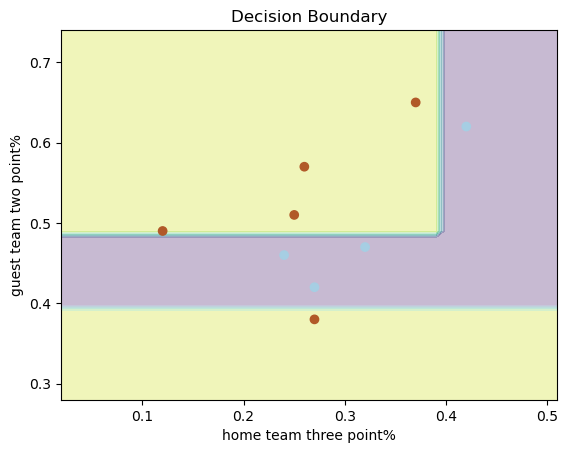

'tree.dot.pdf'

In [182]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
#設定目標
df1 = df[['主隊三分%','客隊兩分%','主場或客場']]
df1 = df[df['主場或客場'].isin([0,1])]

# 創建決策樹模型
X_train, X_test, y_train, y_test = train_test_split(df1[['主隊三分%','客隊兩分%']], df1[['主場或客場']], test_size=0.3,random_state=0)
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=5,random_state=0)
tree.fit(X_train,y_train)
tree.predict(X_test)
y_test['主場或客場'].values

#印出錯誤個數
error = 0
print('錯誤點位:')
for i, v in enumerate(tree.predict(X_test)):
    if v!= y_test['主場或客場'].values[i]:
        print(i,v)
        error+=1
print('錯誤個數:',error)

# 計算預測準確率
accuracy=tree.score(X_test,y_test['主場或客場'])
print('預測正確率:',accuracy)

# 取得訓練資料的特徵欄位
X = X_train[['主隊三分%', '客隊兩分%']].values
# 取得訓練資料的目標欄位
y = y_train['主場或客場'].values

# 訓練分類器
tree.fit(X, y)

# 定義繪圖範圍
plot_x_min, plot_x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
plot_y_min, plot_y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(plot_x_min, plot_x_max, 0.01),
                     np.arange(plot_y_min, plot_y_max, 0.01))

# 用分類器預測網格中每個點的類別
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 繪製決策區域圖
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Paired')
plt.xlabel('home team three point%')
plt.ylabel('guest team two point%')
plt.title('Decision Boundary')
plt.show()

# 顯示決策樹圖形
export_graphviz(tree, out_file='tree.dot', feature_names=['home team three point%', 'guest team two point%'], class_names=['home', 'guest'], filled=True)
src = Source.from_file('tree.dot')
src.view() 

錯誤點位:
0 1
2 1
錯誤個數: 2
預測正確率: 0.6


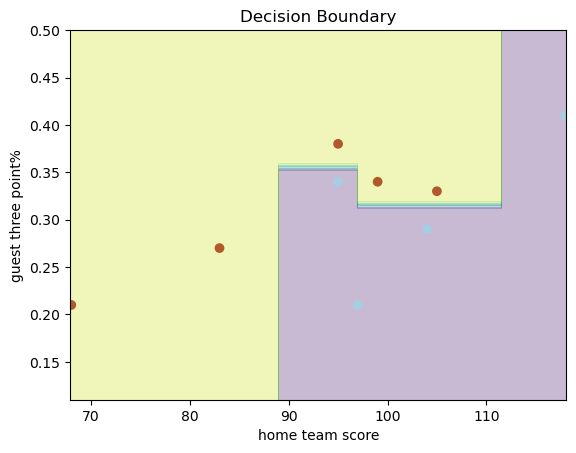

'tree.dot.pdf'

In [183]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#設定目標
df2 = df[['主隊得分','客隊三分%','主場或客場']]
df2 = df[df['主場或客場'].isin([0,1])]

# 創建決策樹模型
X_train, X_test, y_train, y_test = train_test_split(df2[['主隊得分','客隊三分%']], df2[['主場或客場']], test_size=0.3,random_state=0)
tree = DecisionTreeClassifier(criterion = 'gini', max_depth=5,random_state=0)
tree.fit(X_train,y_train)
tree.predict(X_test)
y_test['主場或客場'].values

#印出錯誤個數
error = 0
print('錯誤點位:')
for i, v in enumerate(tree.predict(X_test)):
    if v!= y_test['主場或客場'].values[i]:
        print(i,v)
        error+=1
print('錯誤個數:',error)

# 計算預測準確率
accuracy=tree.score(X_test,y_test['主場或客場'])
print('預測正確率:',accuracy)

# 取得訓練資料的特徵欄位
X = X_train[['主隊得分', '客隊三分%']].values
# 取得訓練資料的目標欄位
y = y_train['主場或客場'].values

# 訓練分類器
tree.fit(X, y)

# 定義繪圖範圍
plot_x_min, plot_x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
plot_y_min, plot_y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(plot_x_min, plot_x_max, 0.01),
                     np.arange(plot_y_min, plot_y_max, 0.01))

# 用分類器預測網格中每個點的類別
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 繪製決策區域圖
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Paired')
plt.xlabel('home team score')
plt.ylabel('guest three point%')
plt.title('Decision Boundary')
plt.show()

# 顯示決策樹圖形
export_graphviz(tree, out_file='tree.dot', feature_names=['home team score', 'guest three point%'], class_names=['home', 'guest'], filled=True)
src = Source.from_file('tree.dot')
src.view() 